# PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch

* `torchvison` -  base domain libarary for PyTorch computer vison
* `torchvison.datasets` - get datasets and data loading functions for computer vison
* `torchvison.models` - get pretrained computer vison models that you can leverage for your own problem
* `torchvision.transforms` - functions for manipulating your vison data (images) to be suitable for use with ML model
* `torch.utils.data.Dataset` - Base dataset class for pyTorch
* `torch.utils.data.DataLoader` - Create a python iterable over a dataset


In [4]:
# Import pyTorch
import torch
from torch import nn

# import torchvison
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


# 1. Creating a dataset

The dataset we'll be using  is FashionMNIST from torchvison.datasets

In [5]:
# Set up training data
train_data = datasets.FashionMNIST(
    root="data",# where  to download data to
    train=True, # we want the training dataset ?  (if false we get testing dataset)
    download=True, # do we want to download it
    transform=torchvision.transforms.ToTensor(), # converting image data to tensor
    target_transform = None, # how we want to transform the labels/targets ?
)

# set up testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14797281.27it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 265971.02it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4968351.22it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20389307.83it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
len(train_data),len(test_data)

(60000, 10000)

In [7]:
# See the first training example
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
# Check shape of our image  (note label does not have shape it's just an integer)
print(f"Image shape: {image.shape} -> [color_channels,height,width]")
print(f"Image label: {class_names[label]}")

## Note it has only one color channel, it's back and white (GREY SCALE)
## it color_channel = 3 (RGB) (color images)

Image shape: torch.Size([1, 28, 28]) -> [color_channels,height,width]
Image label: Ankle boot


### 1.2 Visualizing our data

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

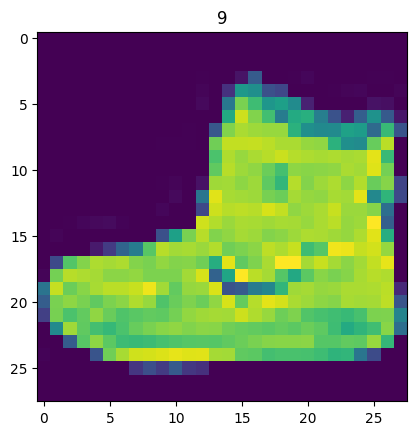

In [12]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze()) # gets image
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

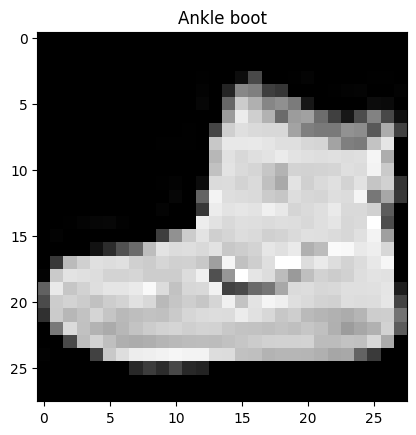

In [13]:
plt.imshow(image.squeeze(),cmap="gray") # images in gray scale
plt.title(class_names[label])

45576
43556
31213
46185
18336
54247
19518
17283
22742
39586
53117
3010
4737
35356
49895
3788


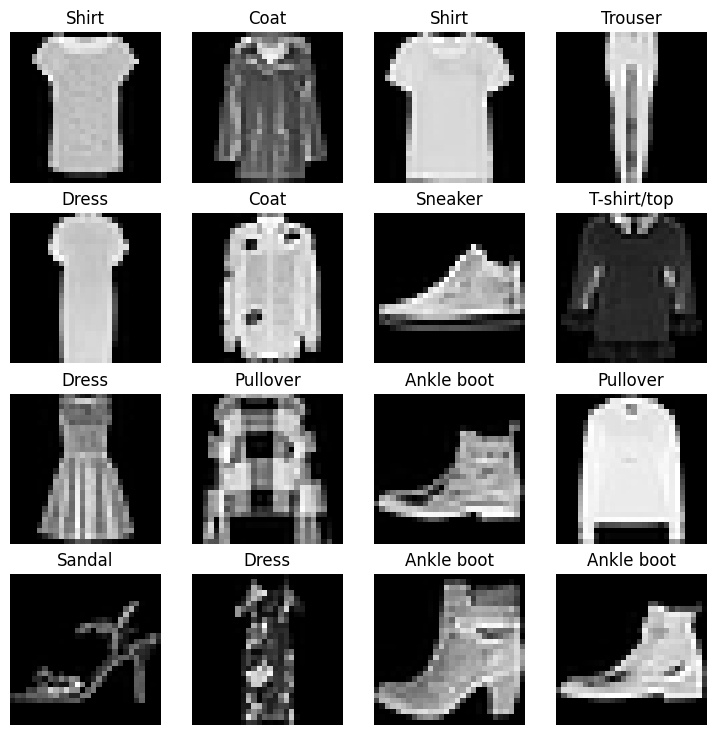

In [14]:
# Plot more Random images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item() # get random indexes /labels
  print(random_idx)
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow( img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Right now, our data is in the form of pyTorch Datasets

DataLoader turns our dataset into a Python iterable

More specifically, we want to turn our data into bactches (or mini-batches)

Why do we do this ?
1. It is more computationally efficient, as our hardware may not be able to look at 6000 images in one hit. so we break it down to 32 images at a time (batch size of 32) usually size
2. It gives our neural network more chances to upates its gradienct per epoch


In [15]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into batches (iterables)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f7631b0f550>,
 <torch.utils.data.dataloader.DataLoader at 0x7f7631edc0d0>)

In [16]:
# Let's check out what we created
print(f"Dataloader : {train_dataloader,test_dataloader}")
print(f"Length of the train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}..")
print(f"Length of the test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}..")

Dataloader : (<torch.utils.data.dataloader.DataLoader object at 0x7f7631b0f550>, <torch.utils.data.dataloader.DataLoader object at 0x7f7631edc0d0>)
Length of the train dataloader: 1875 batches of 32..
Length of the test dataloader: 313 batches of 32..


In [17]:
# Check out what's inside the train data loader
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size :torch.Size([1, 28, 28]) 
label:1, labelshape:torch.Size([])


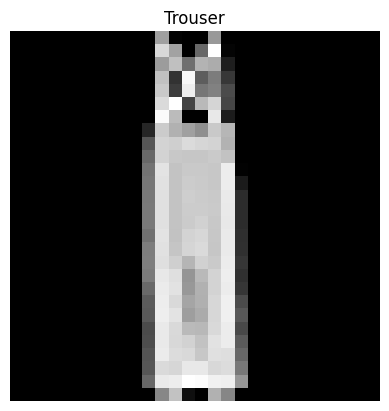

In [18]:
# Show a random sample
# torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size :{image.shape} ")
print(f"label:{label}, labelshape:{label.shape}")

## 3. Model 0 : build a baseline model

when starting to build a series of machine learning modelling experiments it's best practice to start with a baseline model

A baseline model is a simple model , we will try and improve upon with subseqent models/experiments.


In other words, start simple and then add complexity

In [19]:
 # Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # performs forward pass

# print out what happened
print(f"shape before flatten {x.shape} ") # -> [color_channel,height,width]
print(f"shape after flatten {output.shape} ") #=> [color_channel,height * width]


shape before flatten torch.Size([1, 28, 28]) 
shape after flatten torch.Size([1, 784]) 


In [20]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
    )

  def forward(self,x):
    return self.layer_stack(x)


In [21]:
torch.manual_seed(42)

# setup model with input params
model_0 = FashionMNISTModelV0(
    input_shape=784, # output of flatten (28*28)
    hidden_units=10,
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand(1,1,28,28) # dummy forward pass
model_0(dummy_x)


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* loss function - since we are working worth multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD` or Adam
* Evaluation metrics : lets use accuracy as an evaluation metrics

In [24]:
import requests
from pathlib import Path

# download helper functions from learn pytorch repo
if Path("helperfunctions.py").is_file():
  print("helperfunctions.py file already exists, skipped download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [25]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)



## 3.2 Creating a function to time our experiments

machine learning is very experimental .

Two of the main things you will want to track are:
1. Model's performace (loss/accuracy)
2. how fast it Runs

In [26]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device = None):
  """Prints difference between start and end time. """
  total_time = end - start
  print(f"Train time on {device} | {total_time:.3f} seconds")
  return total_time

In [27]:
start_time = timer()
# some code ..
end_time = timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu | 0.000 seconds


4.934000025968999e-05

## 3. Creating a training loop and training a model on batches of data

* loop through epochs
* loop through training batches, performing training steps, calculate train loss per batch
* Loop through testing batches, perform testing steps, calculate test loss per batch
* print out what's happening
* Time it all

In [28]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch} \n-----")

  # Training
  train_loss=0
  # Add a loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):  # mini-batches
    model_0.train()
    #1. forward pass
    y_pred = model_0(X)

    #2. Calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Back to epoch loop
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)   # avg loss per epoch

  ## Testing loop
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

  ## Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch : 1 
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch : 2 
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu | 26.090 seconds


## Make predictions and get model 0 results

In [29]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):

  """ Returns a dictionay containing the result of model predicting on data loader """

  loss,acc= 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      # make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    #Scale the loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created by classname
          "model_loss:": loss.item(),
          "model_acc":acc}

#Calcaulate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss:': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# Setup device agnostic-code (for using GPU if there is one)

In [30]:
## 5. set up device agnostic-code
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 6. Building the same model with non-linearity

In [31]:
# create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Flattens input into a single vector
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [32]:
# Create an instance of model 1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the ouput of the flatten after our 28 by 28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): ReLU()
  )
)

#6.1 Set up loss, optimizer, and evaluation metrics

In [33]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


## 6.2 Functionizing training and evaluation/testing loops

Create function for :
* training loop - `train_step()`
* testing loop - `test_step()`


In [34]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  """Performs  a training with model trying to learn on data_loader"""
  train_loss,train_acc = 0,0

  # put model into training mode
  model.train()


  # Add a loop through the training batches
  for batch, (X,y) in enumerate(data_loader):  # mini-batches
    # put data on target device
    X,y = X.to(device),y.to(device)

    #1. forward pass
    y_pred = model_0(X)

    #2. Calculate the loss and accuracy per batch
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # from logits to prediction labels


    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Back to epoch loop
  # Divide total train loss by length of train dataloader
  train_loss /= len(data_loader)   # avg loss per epoch
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train_acc: {train_acc:.2f}% \n")

In [35]:
def test_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
                accuracy_fn,
               device:torch.device = device):

  """Performs a testing loop step on model going over data loader .."""
  test_loss,test_acc = 0,0

  # put the model in eval mode
  model.eval()

  # Turn on inference mode
  with torch.inference_mode():
    # looping through data loader
    for X,y in data_loader:
      # send data to target device
      X,y = X.to(device),y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss/acc
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss : {test_loss:.5f} | Test acc : {test_acc:.2f}% \n")


In [36]:
# Training and testing
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start = timer()

# set epochs
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch} ...")
  # Training
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn = accuracy_fn,
             device=device
             )

  # Testing
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end = timer()
total_train_time_model_1 = print_train_time(start=train_time_start,end=train_time_end,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0 ...
Train loss: 0.43026 | Train_acc: 84.94% 

Test loss : 2.31079 | Test acc : 12.13% 

Epochs: 1 ...
Train loss: 0.43026 | Train_acc: 84.94% 

Test loss : 2.31079 | Test acc : 12.13% 

Epochs: 2 ...
Train loss: 0.43026 | Train_acc: 84.94% 

Test loss : 2.31079 | Test acc : 12.13% 

Train time on cpu | 25.315 seconds


# Eval model (for pedictions )

In [37]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):

  """ Returns a dictionay containing the result of model predicting on data loader """

  loss,acc= 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # put data on the target device
      X,y = X.to(device),y.to(device)
      # make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    #Scale the loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created by classname
          "model_loss:": loss.item(),
          "model_acc":acc}

#Calcaulate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss:': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [38]:
# Get model_1 result dictionary
model_1_results = eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss:': 2.310786247253418,
 'model_acc': 12.130591054313099}

# Model 2 : Building a Convolutional Neural Network (CNN)
CNN's are also called ConvoNets
CNN's are know for their capabilities to find patterns in visual data

 CNN has the following layers :
 * input layer - takes target images and preoprocesses them for further layers
 * convolution layer - extracts / learns most important features from target images Ex:` torch.nn.ConvXd()`
 * hidden activation/ non-linear activation - adds non-linearity to  learned features  ex: `torch.nn.ReLU()`
 * pooling layer - reduces dimensionality of learned image features ex: Max `torch.nn.MaxPool2d()` or Average `tirch.nn.AvgPool2d()`
 * output layer/linear layer - takes learned features and oupyts them in shape of target labels ex:`torch.nn.Linear(in_features,out_features)`
 * output activation  - converts output logits to prediction probabilites ex: `torch.sigmoid()` or `torch.softmax()`

In [39]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [40]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)



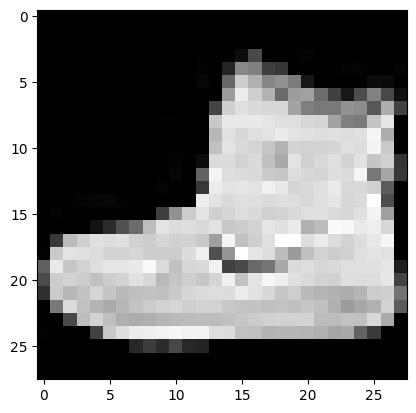

In [41]:
plt.imshow(image.squeeze(),cmap="gray")

In [42]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [43]:
# passing image through model
model_2(rand_image_tensor.unsqueeze(0)).to(device)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

## 7.1 Stepping through nn.Conv2d()


In [44]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32,3,64,64,64))
test_image = images[0]

print(f"Image batch shape : {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"Test image : \n {test_image}")

Image batch shape : torch.Size([32, 3, 64, 64, 64])
single image shape: torch.Size([3, 64, 64, 64])
Test image : 
 tensor([[[[ 1.9269e+00,  1.4873e+00,  9.0072e-01,  ...,  1.8446e+00,
           -1.1845e+00,  1.3835e+00],
          [ 1.4451e+00,  8.5641e-01,  2.2181e+00,  ...,  3.3989e-01,
            7.1997e-01,  4.1141e-01],
          [ 1.9312e+00,  1.0119e+00, -1.4364e+00,  ..., -5.5580e-01,
            7.0427e-01,  7.0988e-01],
          ...,
          [-5.6103e-01, -4.8296e-01,  4.7696e-01,  ..., -2.7131e-01,
           -9.5366e-01, -6.7366e-01],
          [ 3.0757e-01, -1.2766e-01,  3.6591e-02,  ..., -2.0060e+00,
            2.8237e-01, -8.1112e-01],
          [-1.5486e+00,  4.8512e-02, -7.7123e-01,  ..., -1.4031e-01,
            9.4162e-01, -1.1843e-02]],

         [[-5.1969e-01,  1.8524e+00,  1.8365e+00,  ...,  8.9349e-01,
           -1.5114e+00, -8.5147e-01],
          [ 2.0818e+00,  1.0677e+00, -1.4277e+00,  ...,  1.6612e+00,
           -2.6223e+00, -4.3193e-01],
          [-

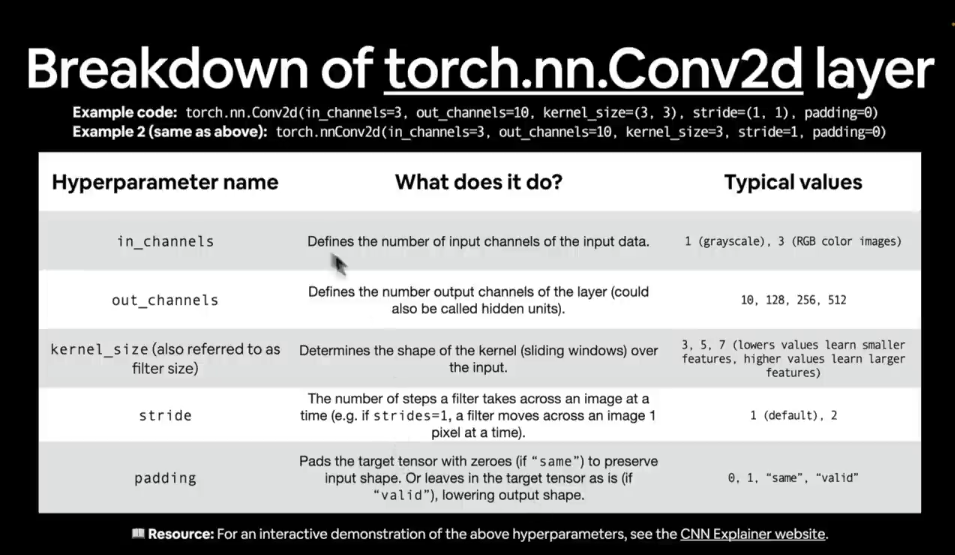

In [47]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,  # convolution / convoling happens one pixel at a time
                       padding=0)  # adds padding on the overall image (usually to process some pixel at the corners)

# Pass the data through the convolution layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_ouput.shape

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 3, 64, 64, 64]

## 7.2 Stepping through `nn.MaxPool2d`


In [46]:
test_image.shape

torch.Size([3, 64, 64, 64])

In [48]:
# Print out original image without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension : {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # makes a 2*2 matrix above our image for convolving,
                                              # basically divides features by 2 (more compression)

# pass data through the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv layer() :{test_image_through_conv.shape} ")

# pass data through max pool layer
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f"shape after going through conv and maxpool : {test_image_through_conv_and_maxpool}")

Test image original shape: torch.Size([3, 64, 64, 64])
Test image with unsqueezed dimension : torch.Size([1, 3, 64, 64, 64])


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 3, 64, 64, 64]

In [ ]:
torch.manual_seed(42)
# create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\n random tensor : {random_tensor}")
print(f"random tensor shape : {random_tensor.shape}")

# create a max_pool_layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n Max pool tensor : {max_pool_tensor}")  # contains the max of the dimensions
print(f"Max pool tensor shape : {max_pool_tensor.shape}")  # shape reduced (compression)


## 7.3 Set up a loss function and optimizer for model - 2

In [49]:
#loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


In [50]:
model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
           

## 7.4 training and testing model_2 using our training and test functions


In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch :{epoch} \n")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                              end=train_time_end_model_2,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch :0 

Train loss: 0.43026 | Train_acc: 84.94% 

Test loss : 2.30231 | Test acc : 9.99% 

Train time on cpu | 10.651 seconds
Epoch :1 

Train loss: 0.43026 | Train_acc: 84.94% 

Test loss : 2.30231 | Test acc : 9.99% 

Train time on cpu | 21.580 seconds
Epoch :2 

Train loss: 0.43026 | Train_acc: 84.94% 

Test loss : 2.30231 | Test acc : 9.99% 

Train time on cpu | 31.920 seconds


In [52]:
# Get_model_2_results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss:': 2.3023064136505127,
 'model_acc': 9.994009584664537}

# 8. Compare model results and training time

In [53]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results  # issue with test_ac in model2 cannot resolve

,model_name,model_loss:,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,2.310786,12.130591
2,FashionMNISTModelV2,2.302306,9.994010


# 9. Make and evaluate random predictions with the best model

In [54]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample (add a batch dimension, and pass it to target deice)
      sample = torch.unsqueeze(sample,dim=0).to(device)

      # forward pass (model ouputs raw logits)
      pred_logit = model(sample)

      # get prediction probability (logit -> prediction probs)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get preprobs off the GPU for the further calculations
      pred_probs.append(pred_prob.cpu())

  # stack the pred_porbs to turn list into a tensor
  return torch.stack(pred_probs)

In [55]:
image,label = test_data[0][:10]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [56]:
import random
random.seed(42)
test_samples = []
test_labels = []

# randomly sampling 9 samples
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

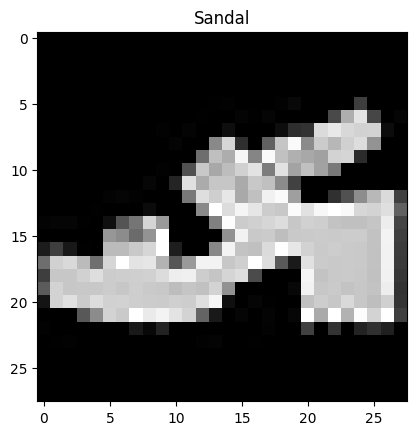

In [57]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [58]:
# Make predictions
pred_probs = make_predictions(model=model_0,
                              data=test_samples)

# view the first two prediction proabilities list
pred_probs[:2]

tensor([[4.4458e-08, 6.3133e-08, 3.4539e-08, 2.4900e-08, 2.0236e-08, 8.9550e-01,
         1.7275e-07, 1.6880e-03, 1.8719e-05, 1.0279e-01],
        [4.1279e-02, 4.1940e-03, 3.0449e-03, 9.0764e-01, 3.8841e-02, 2.8370e-08,
         4.5034e-03, 3.2470e-06, 4.9072e-04, 4.5356e-07]])

In [59]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [60]:
# convert prediction probailites to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes # same format as test_labels

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

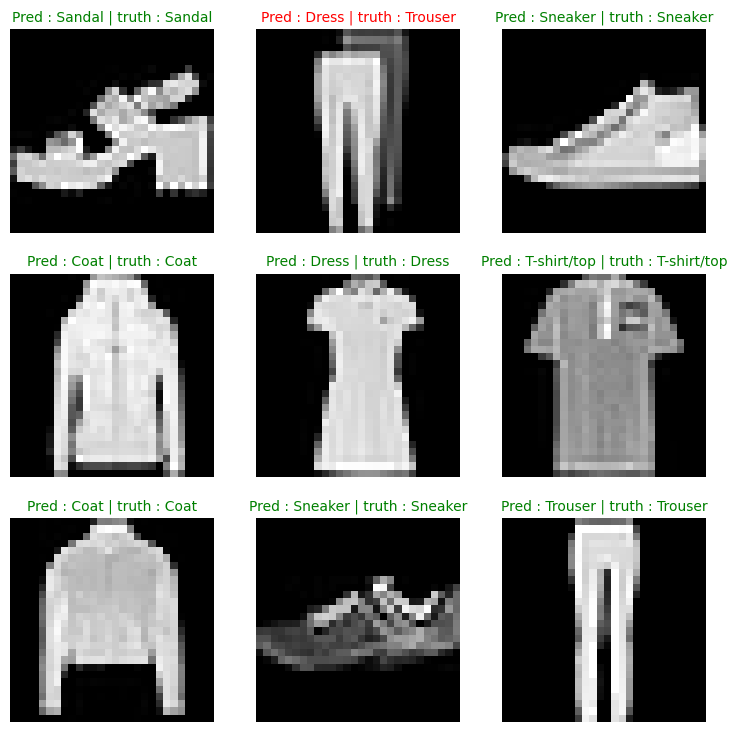

In [61]:
# Plotting predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # create a subplot
  plt.subplot(nrows,ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # find the prediction (in text form eg sandal)
  pred_label = class_names[pred_classes[i]]

  # Get truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  title_text = f"Pred : {pred_label} | truth : {truth_label}"

  # check equality between pred and truth and change the color of the title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")

  plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`


In [62]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_0.eval()  # using model 0 because other model ran into some problems and test accuracy reduction
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc= "Making predictions...."):
    # Send the data and targets to target device
    X,y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_0(X)

    # Turn predictions from logits -> pred probabilities -> pred labels
    y_pred =  torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    # Put predictions on cpu for evaluation
    y_preds.append(y_pred.cpu())

# Concatinate list of predictions into a tensor
print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([5, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 3, 2, 6, 8, 0, 6, 5, 7, 5,
        1, 2, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 7, 6, 5, 2, 3, 2, 6, 4, 2, 5, 6, 2, 2,
        8, 4, 8, 0, 7, 5, 8, 5]), tensor([1, 3, 3, 3, 5, 8, 5, 6, 6, 3, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 3, 8]), tensor([6, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 5, 9, 4, 2, 5, 7, 6, 5, 2, 8, 4, 7, 8,
        8, 0, 5, 9, 3, 6, 8, 4]), tensor([1, 5, 4, 1, 7, 4, 8, 4, 2, 1, 2, 5, 1, 6, 0, 0, 4, 6, 4, 3, 2, 2, 6, 2,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([7, 6, 3, 5, 0, 9, 4, 7, 4, 2, 6, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 7, 3, 8,
        7, 9, 5, 4, 4, 7, 3, 6]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 3, 0, 2, 5, 2, 6, 0, 7, 9, 8, 4, 1, 8, 4, 3, 3,
        3, 2, 7, 2, 8, 5, 3, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 3, 5, 1, 4, 2, 5, 6, 9, 6, 3, 1, 6, 2,
        6, 4, 7, 7, 3, 5, 5, 6]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 2, 6, 3, 8, 9, 6, 1, 2, 6, 4, 3, 0, 8, 3, 7, 4,
       

tensor([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [64]:
len(y_pred_tensor)

10000

In [65]:
# see if requried packages are installed and if not, install them:
try:
  import mlxtend , torchmetrics
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version : {mlxtend.__version__}")




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.4 MB/s eta 0:00:00
mlxtend version : 0.22.0


In [66]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [67]:
y_pred_tensor[:10]

tensor([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [68]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

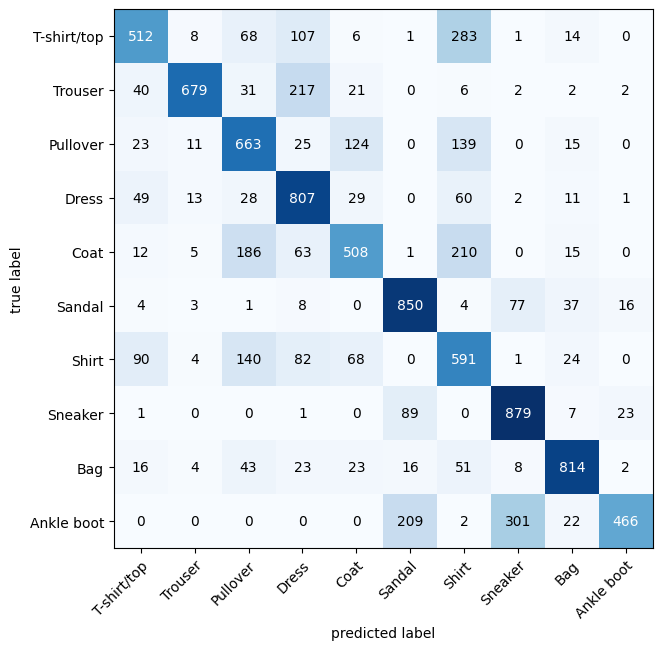

In [69]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Set up confusion instances and compare predictinons to target
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)


In [70]:
confmat_tensor

tensor([[512,   8,  68, 107,   6,   1, 283,   1,  14,   0],
        [ 40, 679,  31, 217,  21,   0,   6,   2,   2,   2],
        [ 23,  11, 663,  25, 124,   0, 139,   0,  15,   0],
        [ 49,  13,  28, 807,  29,   0,  60,   2,  11,   1],
        [ 12,   5, 186,  63, 508,   1, 210,   0,  15,   0],
        [  4,   3,   1,   8,   0, 850,   4,  77,  37,  16],
        [ 90,   4, 140,  82,  68,   0, 591,   1,  24,   0],
        [  1,   0,   0,   1,   0,  89,   0, 879,   7,  23],
        [ 16,   4,  43,  23,  23,  16,  51,   8, 814,   2],
        [  0,   0,   0,   0,   0, 209,   2, 301,  22, 466]])

# Saving and loading our model

In [74]:
from pathlib import Path


# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create  model save
MODEL_NAME =  "03_pytorch_computer_vision_2.pth" # accuracy issue with model 2
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save model state to dict
print(f"Saving model t0 : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model t0 : models/03_pytorch_computer_vision_2.pth


In [75]:
# Create new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV0(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# load in the save state dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send the model to the target device
loaded_model_2.to(device)

# train the model
loaded_model_2.train()

RuntimeError: Error(s) in loading state_dict for FashionMNISTModelV0:
	Missing key(s) in state_dict: "layer_stack.1.weight", "layer_stack.1.bias", "layer_stack.2.weight", "layer_stack.2.bias". 
	Unexpected key(s) in state_dict: "block_1.0.weight", "block_1.0.bias", "block_1.2.weight", "block_1.2.bias", "block_2.0.weight", "block_2.0.bias", "block_2.2.weight", "block_2.2.bias", "classifier.1.weight", "classifier.1.bias". 